<a href="https://colab.research.google.com/github/rooncal/Data-Science/blob/main/Hotel_Reservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports and settings

In [518]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

### Other models ###
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [519]:
pd.options.display.max_colwidth = 999
HOTEL_DATA = "drive/MyDrive/Hotel-Data"

#Understanding the dataset

In [520]:
df = pd.read_csv(f'{HOTEL_DATA}/Hotel-A-train.csv')
validation_set = pd.read_csv(f'{HOTEL_DATA}/Hotel-A-validation.csv')

In [521]:
df.head(3)

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,5/21/2015,2,2,0,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,5/26/2015,3,3,0,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,6/29/2015,3,3,0,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119


In [522]:
df.shape

(27499, 24)

In [523]:
df.describe()

,Reservation-id,Age,Adults,Children,Babies,Discount_Rate,Room_Rate
count,2.749900e+04,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000
mean,5.016461e+07,43.977454,2.333576,1.743882,0.351540,12.495182,175.136478
std,2.886911e+07,15.303148,1.176526,0.721972,0.573326,11.206036,43.877087
min,3.154000e+03,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000
25%,2.523943e+07,31.000000,2.000000,1.000000,0.000000,5.000000,137.000000
50%,5.014996e+07,44.000000,2.000000,2.000000,0.000000,10.000000,175.000000
75%,7.518288e+07,57.000000,3.000000,2.000000,1.000000,20.000000,214.000000
max,9.999900e+07,70.000000,5.000000,3.000000,2.000000,40.000000,250.000000


In [524]:
df.dtypes

Reservation-id             int64
Gender                    object
Age                        int64
Ethnicity                 object
Educational_Level         object
Income                    object
Country_region            object
Hotel_Type                object
Expected_checkin          object
Expected_checkout         object
Booking_date              object
Adults                     int64
Children                   int64
Babies                     int64
Meal_Type                 object
Visted_Previously         object
Previous_Cancellations    object
Deposit_type              object
Booking_channel           object
Required_Car_Parking      object
Reservation_Status        object
Use_Promotion             object
Discount_Rate              int64
Room_Rate                  int64
dtype: object

In [525]:
dictionary_df = pd.read_csv(f'{HOTEL_DATA}/Hotel-A-data-dictionary.csv')

In [526]:
dictionary_df

,Data Field,Description
0,Reservation-id,A unique booking id
1,Gender,Gender of the reservation person
2,Age,Age of the reservation person. Age is varying from 18 -- 70
3,Ethnicity,"Ethnicity of the reservation person. This field takes one of the following ethnicities: Latino, African American, Asian American and Caucasian"
4,Educational_Level,"Educational level of the reservation person. This field takes one of the following educational level; Mid-School, High-School, College and Grad"
5,Income,"Income of the reservation person. This field takes one of the following: <25K, 25K – 50K,50K – 100K and >100K"
6,Country_region,"Country region of the reservation person. This field takes one of the following: North, South, East and West"
7,Hotel_Type,"Hotel type of the reservation; i.e City Hotels, Airport Hotels and Resorts"
8,Expected_checkin,Expected check-in date
9,Expected_checkout,Expected checkout date


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde06c660d0>]],
      dtype=object)

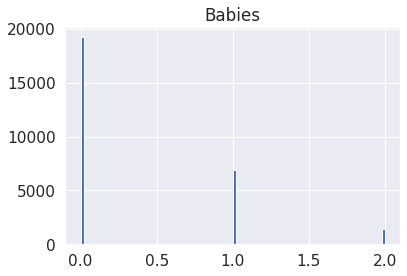

In [527]:
df.hist(column="Babies", bins=100)

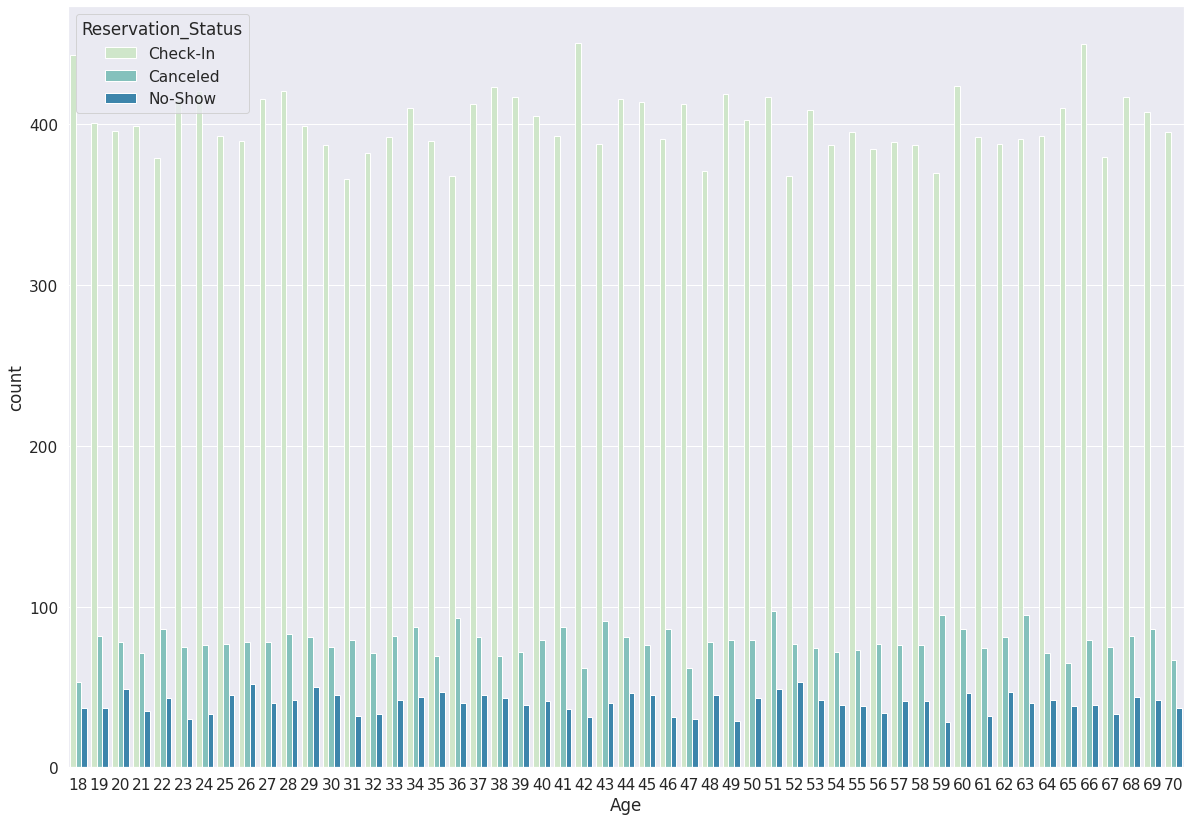

In [528]:
plt.figure(figsize=(20,14))
sns.countplot(x='Age',data = df, hue = 'Reservation_Status',palette='GnBu')
plt.show()

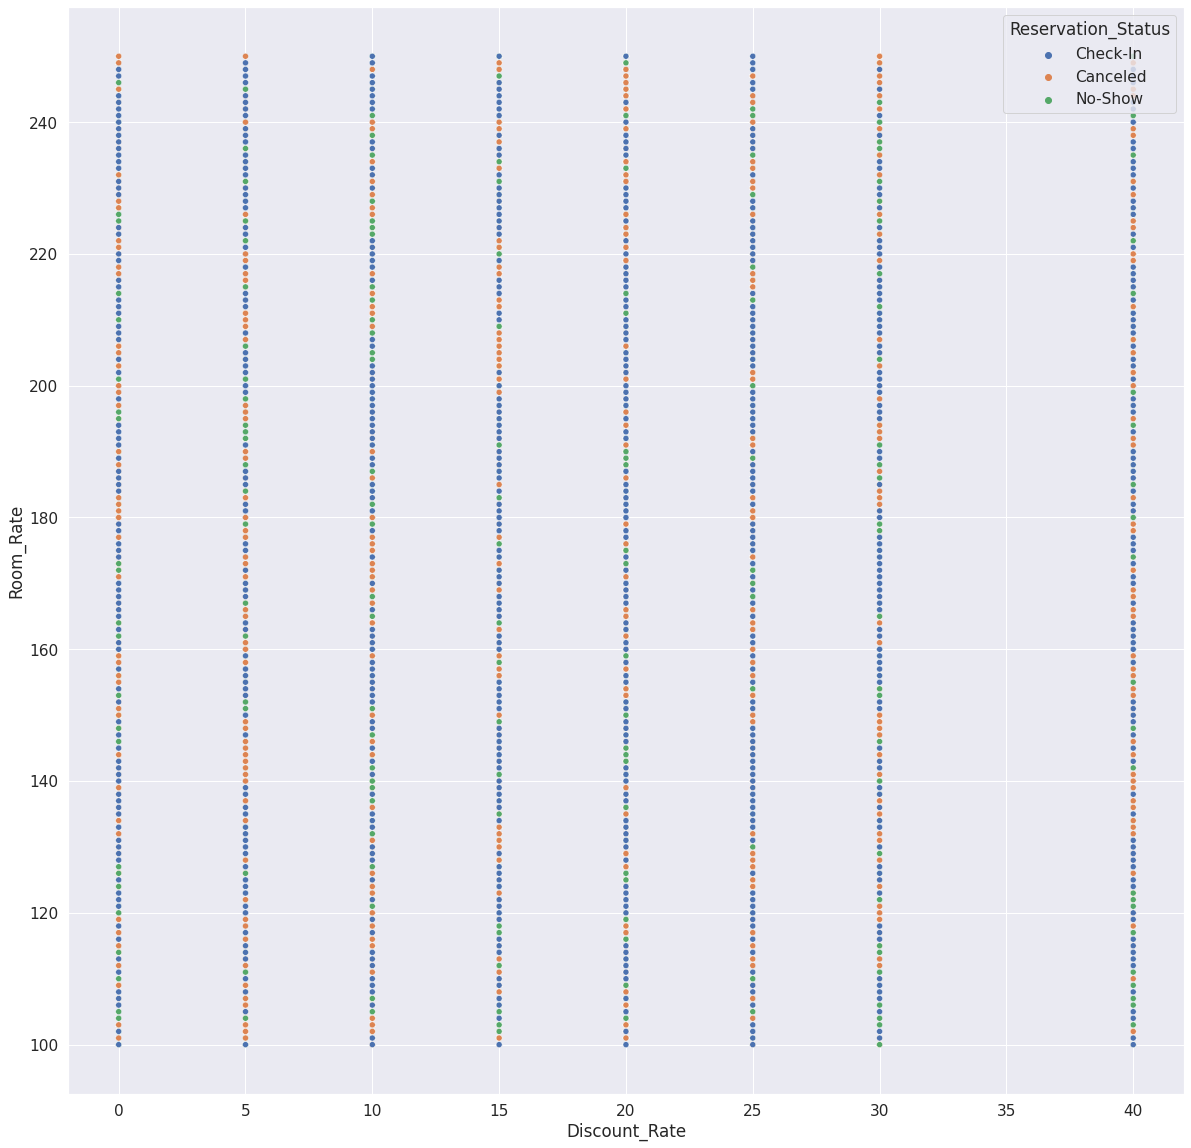

In [529]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Discount_Rate',y='Room_Rate',data=df, hue='Reservation_Status')
plt.show()

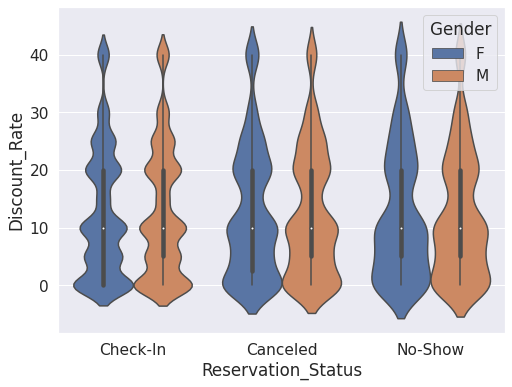

In [530]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Reservation_Status',y='Discount_Rate',data=df, hue='Gender')
plt.show()

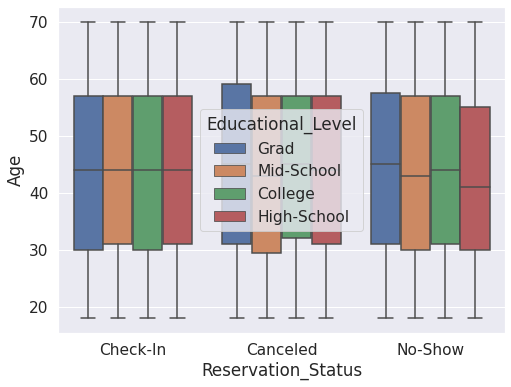

In [531]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Reservation_Status',y='Age',data=df, hue='Educational_Level')
plt.show()

#Data Preprocessing

In [532]:
df.isnull().sum()

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

In [533]:
label_encoder = preprocessing.LabelEncoder()
df.dtypes

Reservation-id             int64
Gender                    object
Age                        int64
Ethnicity                 object
Educational_Level         object
Income                    object
Country_region            object
Hotel_Type                object
Expected_checkin          object
Expected_checkout         object
Booking_date              object
Adults                     int64
Children                   int64
Babies                     int64
Meal_Type                 object
Visted_Previously         object
Previous_Cancellations    object
Deposit_type              object
Booking_channel           object
Required_Car_Parking      object
Reservation_Status        object
Use_Promotion             object
Discount_Rate              int64
Room_Rate                  int64
dtype: object

In [534]:
df.drop_duplicates(subset ="Reservation-id", 
                     keep = False, inplace = True)
print(df) 
df = df.drop("Reservation-id",axis="columns")

       Reservation-id Gender  Age  ... Use_Promotion Discount_Rate Room_Rate
0            39428300      F   40  ...           Yes            10       218
1            77491756      F   49  ...            No             0       185
2            73747291      F   42  ...            No             0       119
3            67301739      M   25  ...           Yes             5       144
4            77222321      F   62  ...           Yes            10       242
...               ...    ...  ...  ...           ...           ...       ...
27494        15645505      F   49  ...           Yes            10       100
27495        56414525      F   49  ...           Yes            40       194
27496        52023375      F   49  ...           Yes             5       202
27497        98041387      M   65  ...           Yes            20       157
27498        55243988      F   48  ...            No             0       210

[27491 rows x 24 columns]


In [535]:
df_2 = pd.get_dummies(df,drop_first=True)
df = df.apply(label_encoder.fit_transform)

In [536]:
df_2.head()

,Age,Adults,Children,Babies,Discount_Rate,Room_Rate,Gender_M,Ethnicity_Asian American,Ethnicity_Latino,Ethnicity_caucasian,Educational_Level_Grad,Educational_Level_High-School,Educational_Level_Mid-School,Income_50K -- 100K,Income_<25K,Income_>100K,Country_region_North,Country_region_South,Country_region_West,Hotel_Type_City Hotel,Hotel_Type_Resort,Expected_checkin_1/1/2016,Expected_checkin_1/1/2017,Expected_checkin_1/10/2016,Expected_checkin_1/10/2017,Expected_checkin_1/11/2016,Expected_checkin_1/11/2017,Expected_checkin_1/12/2016,Expected_checkin_1/12/2017,Expected_checkin_1/13/2016,Expected_checkin_1/13/2017,Expected_checkin_1/14/2016,Expected_checkin_1/14/2017,Expected_checkin_1/15/2016,Expected_checkin_1/15/2017,Expected_checkin_1/16/2016,Expected_checkin_1/16/2017,Expected_checkin_1/17/2016,Expected_checkin_1/17/2017,Expected_checkin_1/18/2015,...,Booking_date_9/27/2016,Booking_date_9/28/2014,Booking_date_9/28/2015,Booking_date_9/28/2016,Booking_date_9/29/2015,Booking_date_9/29/2016,Booking_date_9/3/2014,Booking_date_9/3/2015,Booking_date_9/3/2016,Booking_date_9/30/2014,Booking_date_9/30/2015,Booking_date_9/30/2016,Booking_date_9/4/2015,Booking_date_9/4/2016,Booking_date_9/5/2015,Booking_date_9/5/2016,Booking_date_9/6/2014,Booking_date_9/6/2015,Booking_date_9/6/2016,Booking_date_9/7/2014,Booking_date_9/7/2015,Booking_date_9/7/2016,Booking_date_9/8/2014,Booking_date_9/8/2015,Booking_date_9/8/2016,Booking_date_9/9/2014,Booking_date_9/9/2015,Booking_date_9/9/2016,Meal_Type_FB,Meal_Type_HB,Visted_Previously_Yes,Previous_Cancellations_Yes,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_Yes,Reservation_Status_Check-In,Reservation_Status_No-Show,Use_Promotion_Yes
0,40,2,2,0,10,218,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1
1,49,3,3,0,0,185,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0
2,42,3,3,0,0,119,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
3,25,4,3,0,5,144,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1
4,62,1,1,0,10,242,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [537]:
x = df[["Age", "Discount_Rate", "Room_Rate"]].values
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(x))


In [538]:
df = pd.DataFrame(min_max_scaler.fit_transform(df))

In [539]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.0,0.423077,0.666667,0.333333,0.666667,0.333333,0.5,0.727778,0.768319,0.609541,0.25,0.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,1.0,0.285714,0.786667
1,0.0,0.596154,0.666667,1.000000,0.333333,0.000000,0.5,0.727778,0.768319,0.623675,0.50,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.5,0.0,0.000000,0.566667
2,0.0,0.461538,1.000000,0.333333,0.666667,0.000000,0.5,0.764444,0.820043,0.726148,0.50,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.000000,0.126667
3,1.0,0.134615,0.000000,0.000000,1.000000,0.666667,0.0,0.764444,0.803879,0.697880,0.75,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,1.0,0.142857,0.293333
4,0.0,0.846154,0.666667,0.666667,0.000000,0.000000,1.0,0.801111,0.813578,0.697880,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,1.0,0.285714,0.946667


In [540]:
#df[["Age", "Discount_Rate", "Room_Rate"]] = df_scaled[[0,1,2]] 

In [541]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.0,0.423077,0.666667,0.333333,0.666667,0.333333,0.5,0.727778,0.768319,0.609541,0.25,0.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,1.0,0.285714,0.786667
1,0.0,0.596154,0.666667,1.000000,0.333333,0.000000,0.5,0.727778,0.768319,0.623675,0.50,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.5,0.0,0.000000,0.566667
2,0.0,0.461538,1.000000,0.333333,0.666667,0.000000,0.5,0.764444,0.820043,0.726148,0.50,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.000000,0.126667


#Feature Engineering

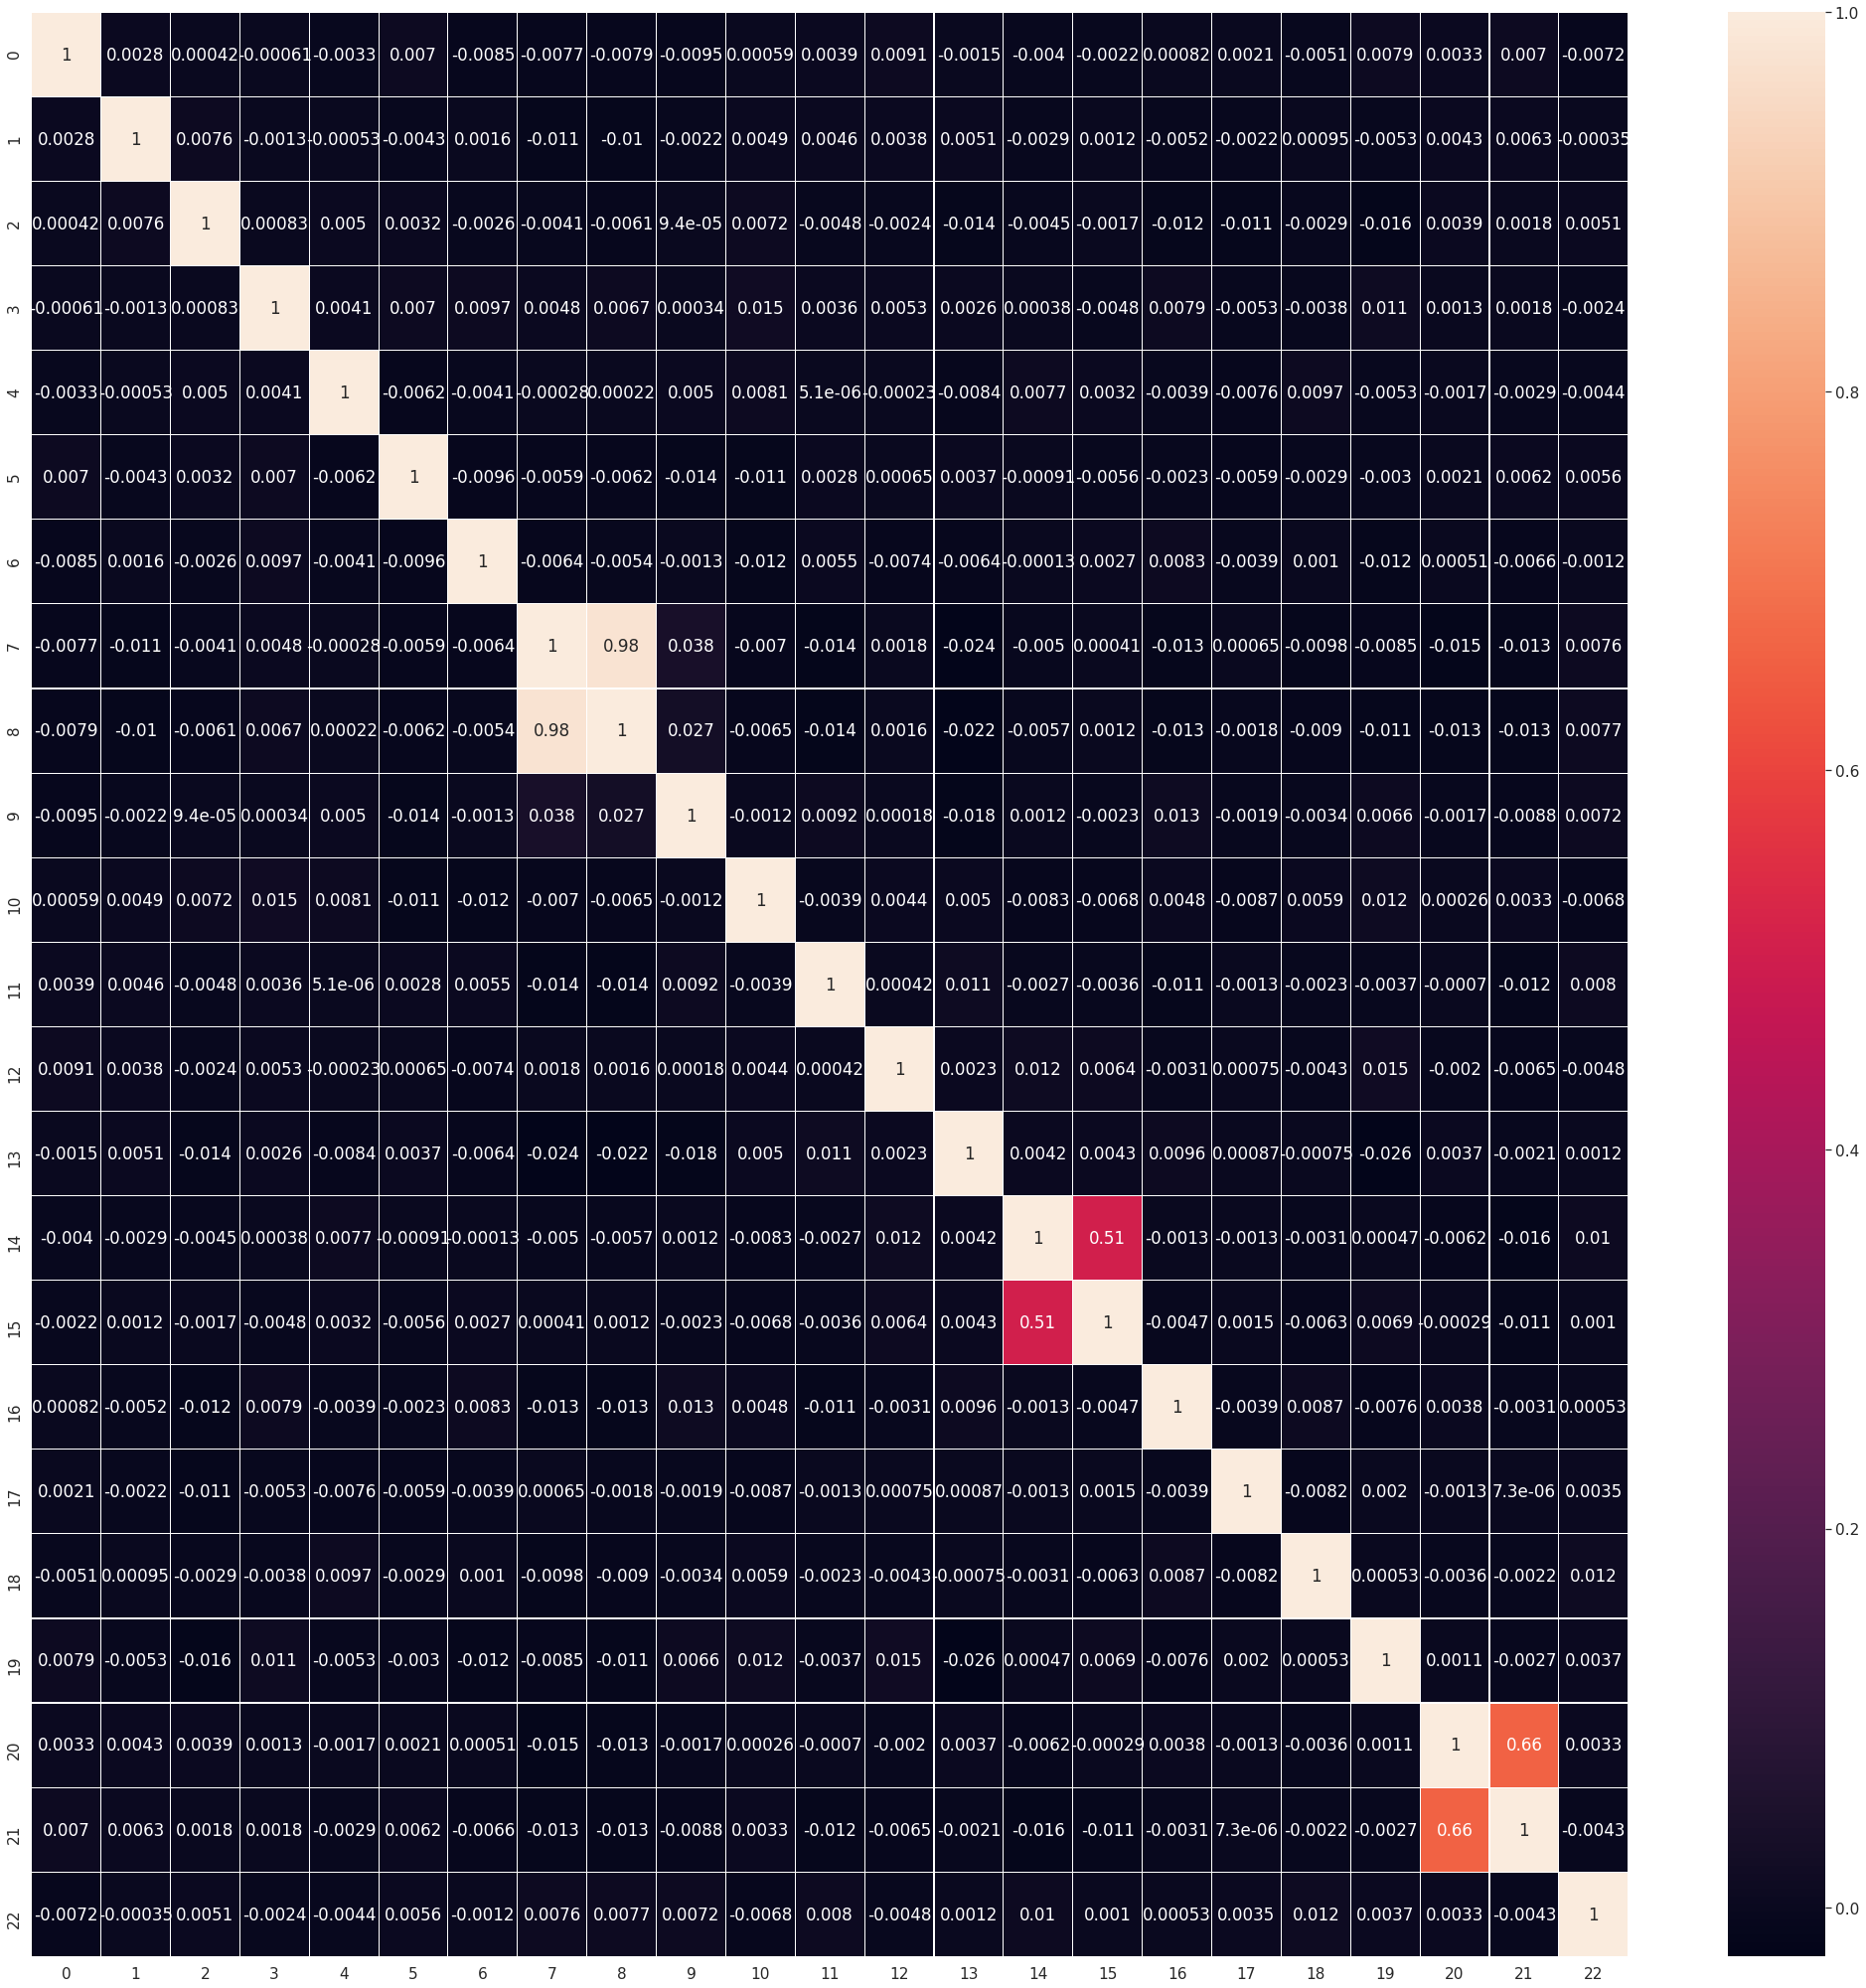

In [542]:
plt.figure(figsize=(36,36))
plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot = True ,linewidths=.1)
plt.show()

In [543]:
df = df.drop([7,14], axis=1)

In [544]:
rf = RandomForestClassifier()
y_train = df.copy(deep=True)[20]
model = rf.fit(df.drop(20, axis=1),y_train)

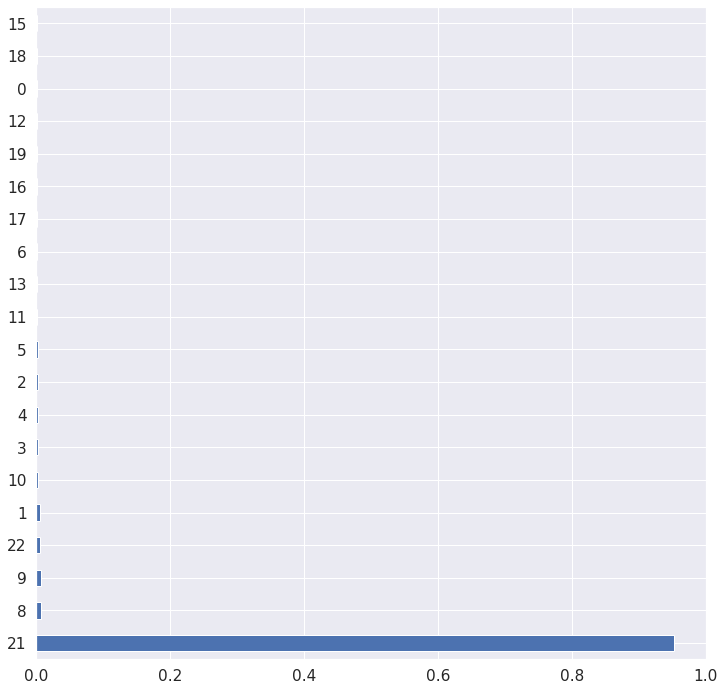

In [545]:
importance = rf.feature_importances_
feat_importances_act = pd.Series(importance, index=df.drop(20, axis=1).columns)
feat_importances = feat_importances_act.nlargest(20)
feat_importances.plot(kind='barh', figsize=(12,12))

#Applying ML Models

In [546]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(20,1), df[20], test_size = .2, random_state=9)

In [547]:
df[20].head(20)

0     1.0
1     0.0
2     0.0
3     1.0
4     1.0
5     1.0
6     1.0
7     0.0
8     1.0
9     1.0
10    0.0
11    1.0
12    0.0
13    1.0
14    1.0
15    1.0
16    0.0
17    0.0
18    1.0
19    0.0
Name: 20, dtype: float64

In [548]:
model = RandomForestClassifier(max_depth=20)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test,predictions))

1.0


In [549]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gaussian Naive Bayes :',GaussianNB()]]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

Logistic Regression : 1.0
Decision Tree Classification : 1.0
Gradient Boosting Classification : 1.0
Ada Boosting Classification : 1.0
Extra Tree Classification : 1.0
K-Neighbors Classification : 0.7983269685397345
Support Vector Classification : 1.0
Gaussian Naive Bayes : 1.0


#Hyper Parameter Tuning



#Model Evaluation

In [550]:
cm_lr = confusion_matrix(y_test,predictions)

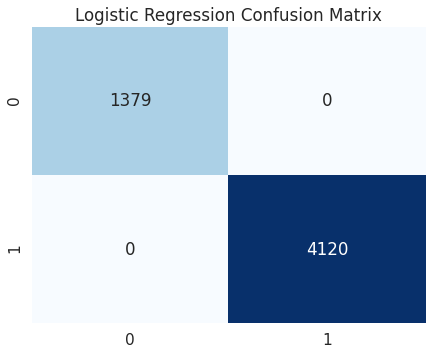

In [551]:
plt.figure(figsize=(24,12))

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()